# Pandas

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

## Introducing Pandas objects

We’ll start with a quick, non-comprehensive overview of the fundamental data structures in pandas to get you started. The fundamental behavior about data types, indexing, axis labeling, and alignment apply across all of the objects. To get started, import NumPy and load pandas into your namespace:

In [1]:
import numpy as np
import pandas as pd

### Series

`Series` is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. The basic method to create a `Series` is to call:

```py
s = pd.Series(data, index=index)
```

Here, `data` can be many different things:

- a Python dict
- an ndarray
- a scalar value (like 5)


The passed **index** is a list of axis labels. Thus, this separates into a few cases depending on what **data is**:

#### Create a Series

##### From ndarray

If `data` is an ndarray, **index** must be the same length as **data**. If no index is passed, one will be created having values `[0, ..., len(data) - 1]`.

In [2]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

In [3]:
s

a   -1.883778
b   -0.789068
c    0.260679
d    0.720511
e    0.534130
dtype: float64

In [4]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [5]:
pd.Series(np.random.randn(5))

0   -1.680796
1   -0.058632
2    0.975342
3    1.330475
4    0.106512
dtype: float64

```{note}
Pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, an exception will be raised at that time.
```

##### From dict
`Series` can be instantiated from dicts:

In [6]:
d = {"b": 1, "a": 0, "c": 2}

In [7]:
pd.Series(d)

b    1
a    0
c    2
dtype: int64

If an index is passed, the values in data corresponding to the labels in the index will be pulled out.

In [8]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}

In [9]:
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [10]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

```{note}
NaN (not a number) is the standard missing data marker used in pandas.
```

##### From scalar value

If `data` is a scalar value, an index must be provided. The value will be repeated to match the length of **index**.

In [11]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

#### Series is ndarray-like

`Series` acts very similarly to a `ndarray` and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [12]:
s[0]

-1.8837783840331181

In [13]:
s[:3]

a   -1.883778
b   -0.789068
c    0.260679
dtype: float64

In [14]:
s[s > s.median()]

d    0.720511
e    0.534130
dtype: float64

In [15]:
s[[4, 3, 1]]

e    0.534130
d    0.720511
b   -0.789068
dtype: float64

In [16]:
np.exp(s)

a    0.152015
b    0.454268
c    1.297811
d    2.055484
e    1.705964
dtype: float64

Like a NumPy array, a pandas Series has a single dtype.

In [17]:
s.dtype

dtype('float64')

If you need the actual array backing a `Series`, use `Series.array`.

In [18]:
s.array

<PandasArray>
[-1.8837783840331181, -0.7890675558948984, 0.26067925649386786,
   0.720511122383276,  0.5341303483517282]
Length: 5, dtype: float64

While `Series` is ndarray-like, if you need an actual ndarray, then use `Series.to_numpy()`.

In [19]:
s.to_numpy()

array([-1.88377838, -0.78906756,  0.26067926,  0.72051112,  0.53413035])

Even if the `Series` is backed by a `ExtensionArray`, `Series.to_numpy()` will return a NumPy ndarray.

#### Series is dict-like

A `Series` is also like a fixed-size dict in that you can get and set values by index label:

In [20]:
s["a"]

-1.8837783840331181

In [21]:
s["e"] = 12.0

In [22]:
s

a    -1.883778
b    -0.789068
c     0.260679
d     0.720511
e    12.000000
dtype: float64

In [23]:
"e" in s

True

In [24]:
"f" in s

False

If a label is not contained in the index, an exception is raised:

In [25]:
s["f"]

KeyError: 'f'

Using the `Series.get()` method, a missing label will return None or specified default:

In [26]:
s.get("f")

In [27]:
s.get("f", np.nan)

nan

These labels can also be accessed by `attribute`.

#### Vectorized operations and label alignment with Series

When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with `Series` in pandas. `Series` can also be passed into most NumPy methods expecting an ndarray.

In [28]:
s + s

a    -3.767557
b    -1.578135
c     0.521359
d     1.441022
e    24.000000
dtype: float64

In [29]:
s * 2

a    -3.767557
b    -1.578135
c     0.521359
d     1.441022
e    24.000000
dtype: float64

In [30]:
np.exp(s)

a         0.152015
b         0.454268
c         1.297811
d         2.055484
e    162754.791419
dtype: float64

A key difference between `Series` and ndarray is that operations between `Series` automatically align the data based on label. Thus, you can write computations without giving consideration to whether the `Series` involved have the same labels.

In [31]:
s[1:] + s[:-1]

a         NaN
b   -1.578135
c    0.521359
d    1.441022
e         NaN
dtype: float64

The result of an operation between unaligned `Series` will have the **union** of the indexes involved. If a label is not found in one `Series` or the other, the result will be marked as missing `NaN`. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research. The integrated data alignment features of the pandas data structures set pandas apart from the majority of related tools for working with labeled data.

```{note}
In general, we chose to make the default result of operations between differently indexed objects yield the **union** of the indexes in order to avoid loss of information. Having an index label, though the data is missing, is typically important information as part of a computation. You of course have the option of dropping labels with missing data via the **dropna** function.
```

#### Name attribute

`Series` also has a `name` attribute:

In [32]:
s = pd.Series(np.random.randn(5), name="something")

In [33]:
s

0   -0.804005
1   -0.163070
2   -0.796799
3    0.981336
4    1.403383
Name: something, dtype: float64

In [34]:
s.name

'something'

The `Series` `name` can be assigned automatically in many cases, in particular, when selecting a single column from a `DataFrame`, the `name` will be assigned the column label.

You can rename a `Series` with the `pandas.Series.rename()` method.

In [35]:
s2 = s.rename("different")

In [36]:
s2.name

'different'

Note that `s` and `s2` refer to different objects.

### DataFrame

`DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of `Series` objects. It is generally the most commonly used pandas object. Like `Series`, `DataFrame` accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or `Series`
- 2-D numpy.ndarray
- Structured or record ndarray
- A `Series`
- Another `DataFrame`

Along with the data, you can optionally pass **index** (row labels) and **columns** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

#### Create a dataframe

##### From dict of Series or dicts

The resulting **index** will be the **union** of the indexes of the various Series. If there are any nested dicts, these will first be converted to Series. If no columns are passed, the columns will be the ordered list of dict keys.

In [37]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

In [38]:
df = pd.DataFrame(d)

In [39]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [40]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [41]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


The row and column labels can be accessed respectively by accessing the **index** and **columns** attributes:

```{note}
When a particular set of columns is passed along with a dict of data, the passed columns override the keys in the dict.
```

In [42]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [43]:
df.columns

Index(['one', 'two'], dtype='object')

##### From dict of ndarrays / lists

The ndarrays must all be the same length. If an index is passed, it must also be the same length as the arrays. If no index is passed, the result will be `range(n)`, where `n` is the array length.

In [44]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

In [45]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [46]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


##### From structured or record array

This case is handled identically to a dict of arrays.

In [47]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])

In [48]:
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]

In [49]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [50]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [51]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


```{note}
DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.
```


##### From a list of dicts

In [52]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]

In [53]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [54]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [55]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


##### From a dict of tuples

You can automatically create a MultiIndexed frame by passing a tuples dictionary.

In [56]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

##### From a Series

The result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only if no other column name provided).

In [57]:
ser = pd.Series(range(3), index=list("abc"), name="ser")

In [58]:
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


##### From a list of namedtuples

The field names of the first `namedtuple` in the list determine the columns of the `DataFrame`. The remaining namedtuples (or tuples) are simply unpacked and their values are fed into the rows of the `DataFrame`. If any of those tuples is shorter than the first `namedtuple` then the later columns in the corresponding row are marked as missing values. If any are longer than the first `namedtuple` , a `ValueError` is raised.

In [59]:
from collections import namedtuple

In [60]:
Point = namedtuple("Point", "x y")

In [61]:
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [62]:
Point3D = namedtuple("Point3D", "x y z")

In [63]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


##### From a list of dataclasses

Data Classes as introduced in PEP557, can be passed into the DataFrame constructor. Passing a list of dataclasses is equivalent to passing a list of dictionaries.

Please be aware, that all values in the list should be dataclasses, mixing types in the list would result in a `TypeError`.

In [64]:
from dataclasses import make_dataclass

In [65]:
Point = make_dataclass("Point", [("x", int), ("y", int)])

In [66]:
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


#### Column selection, addition, deletion

You can treat a `DataFrame` semantically like a dict of like-indexed `Series` objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [67]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [68]:
df["three"] = df["one"] * df["two"]

In [69]:
df["flag"] = df["one"] > 2

In [70]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


Columns can be deleted or popped like with a dict:

In [71]:
del df["two"]

In [72]:
three = df.pop("three")

In [73]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


When inserting a scalar value, it will naturally be propagated to fill the column:

In [74]:
df["foo"] = "bar"

In [75]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


When inserting a `Series` that does not have the same index as the `DataFrame`, it will be conformed to the DataFrame’s index:

In [76]:
df["one_trunc"] = df["one"][:2]

In [77]:
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


You can insert raw ndarrays but their length must match the length of the DataFrame’s index.

By default, columns get inserted at the end. `DataFrame.insert()` inserts at a particular location in the columns:

In [78]:
df.insert(1, "bar", df["one"])

In [79]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


#### Assigning new columns in method chains

DataFrame has an `assign()` method that allows you to easily create new columns that are potentially derived from existing columns.

In [80]:
iris = pd.read_csv("../../assets/data/iris.csv")

In [81]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
iris.assign(sepal_ratio=iris["SepalWidth"] / iris["SepalLength"]).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In the example above, we inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.

In [83]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidth"] / x["SepalLength"])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


`assign()` **always** returns a copy of the data, leaving the original DataFrame untouched.

Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using `assign()` in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

<AxesSubplot: xlabel='SepalRatio', ylabel='PetalRatio'>

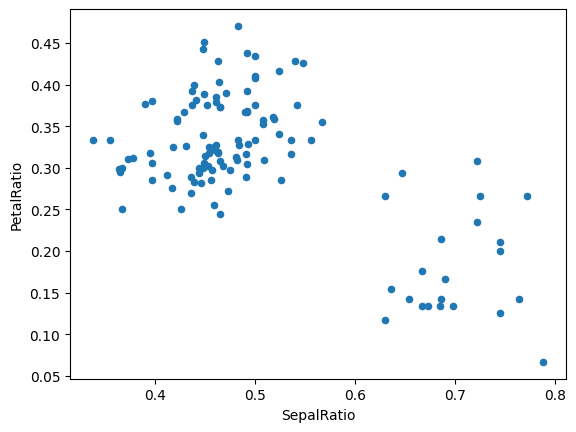

In [84]:
(
    iris.query("SepalLength > 5")
    .assign(
        SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
        PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that’s been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations. This is an example where we didn’t have a reference to the filtered DataFrame available.

The function signature for `assign()` is simply `**kwargs`. The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a `Series` or NumPy array), or a function of one argument to be called on the `DataFrame`. A copy of the original `DataFrame` is returned, with the new values inserted.

The order of `**kwargs` is preserved. This allows for dependent assignment, where an expression later in `**kwargs` can refer to a column created earlier in the same `assign()`.

In [85]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

In [86]:
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In the second expression, `x['C']` will refer to the newly created column, that’s equal to `dfa['A'] + dfa['B']`.

#### Indexing / selection

The basics of indexing are as follows:

|Operation                     |Syntax         |Result   |
|:-------                      |:-----         |:-----   |
|Select column                 |`df[col]`      |Series   |
|Select row by label           |`df.loc[label]`|Series   |
|Select row by integer location|`df.iloc[loc]` |Series   |
|Slice rows                    |`df[5:10] `    |DataFrame|
|Select rows by boolean vector |`df[bool_vec]` |DataFrame|

Row selection, for example, returns a `Series` whose index is the columns of the `DataFrame`:

In [87]:
df.loc["b"]

one            2.0
bar            2.0
flag         False
foo            bar
one_trunc      2.0
Name: b, dtype: object

In [88]:
df.iloc[2]

one           3.0
bar           3.0
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

#### Data alignment and arithmetic

Data alignment between `DataFrame` objects automatically align on **both the columns and the index (row labels)**. Again, the resulting object will have the union of the column and row labels.

In [89]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])

In [90]:
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])

In [91]:
df + df2

,A,B,C,D
0,1.507152,1.740797,2.424633,NaN
1,-1.157474,-0.810954,0.314150,NaN
2,0.314844,-1.642104,0.944664,NaN
3,-0.789793,-1.766489,0.007156,NaN
4,-1.701656,1.178084,-0.885031,NaN
5,-1.837818,-0.357916,-1.092826,NaN
6,0.836240,0.624470,0.125121,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between `DataFrame` and `Series`, the default behavior is to align the `Series` **index** on the `DataFrame` **columns**, thus broadcasting row-wise. For example:

In [92]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.579627,-2.238584,-0.544726,-0.351982
2,-0.170552,-1.083243,-1.142937,-0.243249
3,-1.546997,-1.969876,0.001825,1.135471
4,-1.052183,1.111913,-3.090532,1.319314
5,-2.189833,-1.228788,-0.512555,1.773444
6,0.572822,-0.727549,0.214368,2.395344
7,1.368067,-2.080525,-1.649899,0.173804
8,0.337762,-1.195524,-1.521500,-1.802177
9,-1.169445,-2.524254,0.167803,-1.321482


Arithmetic operations with scalars operate element-wise:

In [93]:
df * 5 + 2

,A,B,C,D
0,3.574847,8.696011,5.280811,-1.950104
1,0.676711,-2.496910,2.557179,-3.710013
2,2.722088,3.279798,-0.433875,-3.166349
3,-4.160136,-1.153370,5.289938,3.727252
4,-1.686068,14.255574,-10.171847,4.646467
5,-7.374320,2.552072,2.718036,6.917114
6,6.438958,5.058267,6.352650,10.026616
7,10.415180,-1.706612,-2.968683,-1.081084
8,5.263656,2.718394,-2.326690,-10.960990
9,-2.272380,-3.925259,6.119828,-8.557513


In [94]:
1 / df

,A,B,C,D
0,3.174912,0.746713,1.524014,-1.265789
1,-3.778465,-1.111874,8.973777,-0.875655
2,6.924366,3.906867,-2.054337,-0.967801
3,-0.811670,-1.585605,1.519786,2.894772
4,-1.356459,0.407978,-0.410784,1.889312
5,-0.533372,9.056795,6.963436,1.016857
6,1.126390,1.634913,1.148725,0.622927
7,0.594164,-1.348941,-1.006303,-1.622805
8,1.532024,6.959971,-1.155618,-0.385773
9,-1.170308,-0.843845,1.213643,-0.473596


In [95]:
df ** 4

,A,B,C,D
0,0.009842,3.216508,0.185372,0.389542
1,0.004906,0.654300,0.000154,1.700859
2,0.000435,0.004292,0.056145,1.139869
3,2.303994,0.158205,0.187444,0.014241
4,0.295375,36.095634,35.119308,0.078485
5,12.356034,0.000149,0.000425,0.935322
6,0.621218,0.139966,0.574295,6.641253
7,8.023679,0.302015,0.975181,0.144190
8,0.181526,0.000426,0.560716,45.151556
9,0.533089,1.972192,0.460931,19.877715


Boolean operators operate element-wise as well:

In [96]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)

In [97]:
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)

In [98]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [99]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [100]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [101]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


#### Transposing

To transpose, access the `T` attribute or `DataFrame.transpose()`, similar to an ndarray:

In [102]:
df[:5].T

,0,1,2,3,4
A,0.314969,-0.264658,0.144418,-1.232027,-0.737214
B,1.339202,-0.899382,0.255960,-0.630674,2.451115
C,0.656162,0.111436,-0.486775,0.657988,-2.434369
D,-0.790021,-1.142003,-1.033270,0.345450,0.529293


## Data indexing and selection

The axis labeling information in pandas objects serves many purposes:

- Identifies data (i.e. provides metadata) using known indicators, important for analysis, visualization, and interactive console display.
- Enables automatic and explicit data alignment.
- Allows intuitive getting and setting of subsets of the data set.

In this section, we will focus on the final point: namely, how to slice, dice, and generally get and set subsets of pandas objects. The primary focus will be on Series and DataFrame as they have received more development attention in this area.

```{note}
The Python and NumPy indexing operators `[]` and attribute operator `.` provide quick and easy access to pandas data structures across a wide range of use cases. This makes interactive work intuitive, as there’s little new to learn if you already know how to deal with Python dictionaries and NumPy arrays. However, since the type of the data to be accessed isn’t known in advance, directly using standard operators has some optimization limits. For production code, we recommended that you take advantage of the optimized pandas data access methods exposed in this chapter.
```

```{warning}
Whether a copy or a reference is returned for a setting operation, may depend on the context. This is sometimes called `chained assignment` and should be avoided.
```

### Different choices for indexing

Object selection has had a number of user-requested additions in order to support more explicit location based indexing. pandas now supports three types of multi-axis indexing.

- `.loc` is primarily label based, but may also be used with a boolean array. `.loc` will raise `KeyError` when the items are not found. Allowed inputs are:

    - A single label, e.g. `5` or `'a'` (Note that `5` is interpreted as a label of the index. This use is not an integer position along the index.).

    - A list or array of labels `['a', 'b', 'c']`.

    - A slice object with labels `'a':'f'` (Note that contrary to usual Python slices, both the start and the stop are included, when present in the index!)

    - A boolean array (any `NA` values will be treated as `False`).

    - A `callable` function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above).

- `.iloc` is primarily integer position based (from `0` to `length-1` of the axis), but may also be used with a boolean array. `.iloc` will raise `IndexError` if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with Python/NumPy slice semantics). Allowed inputs are:

    - An integer e.g. `5`.

    - A list or array of integers `[4, 3, 0]`.

    - A slice object with ints `1:7`.

    - A boolean array (any `NA` values will be treated as `False`).

    - A `callable` function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above).

- `.loc`, `.iloc`, and also `[]` indexing can accept a `callable` as indexer.

Getting values from an object with multi-axes selection uses the following notation (using `.loc` as an example, but the following applies to `.iloc` as well). Any of the axes accessors may be the null slice `:`. Axes left out of the specification are assumed to be `:`, e.g. `p.loc['a']` is equivalent to `p.loc['a', :]`.

|**Object Type**|**Indexers**                        |
|:--            |:-                                  |
|Series         |`s.loc[indexer]`                    |
|DataFrame      |`df.loc[row_indexer,column_indexer]`|

### Basics

As mentioned when introducing the data structures in the last section, the primary function of indexing with `[]` (a.k.a.` __getitem__` for those familiar with implementing class behavior in Python) is selecting out lower-dimensional slices. The following table shows return type values when indexing pandas objects with `[]`:


|**Object Type**|**Selection**   |Return Value Type                |
|:-             |:-              |:-                               |
|Series         |`series[label]` |scalar value                     |
|DataFrame      |`frame[colname]`|`Series` corresponding to colname|

Here we construct a simple time series data set to use for illustrating the indexing functionality:

In [103]:
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 4),
                  index=dates, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2000-01-01,0.416281,0.041281,-0.656394,0.877240
2000-01-02,-0.641204,-1.457829,-0.893446,-0.386040
2000-01-03,0.065575,0.644062,0.505851,-0.099026
2000-01-04,0.751173,-0.938221,2.132040,0.895626
2000-01-05,-1.009457,0.093040,-0.610079,-1.035810
2000-01-06,-1.561779,-0.457737,-0.054819,0.178751
2000-01-07,-0.700417,0.847872,0.341968,0.291807
2000-01-08,1.832962,-0.751015,-0.651569,-0.452658


```{note}
None of the indexing functionality is time series specific unless specifically stated.
```

Thus, as per above, we have the most basic indexing using `[]`:

In [104]:
s = df['A']

s[dates[5]]

-1.5617787236153062

You can pass a list of columns to `[]` to select columns in that order. If a column is not contained in the DataFrame, an exception will be raised. Multiple columns can also be set in this manner:

In [105]:
df

,A,B,C,D
2000-01-01,0.416281,0.041281,-0.656394,0.877240
2000-01-02,-0.641204,-1.457829,-0.893446,-0.386040
2000-01-03,0.065575,0.644062,0.505851,-0.099026
2000-01-04,0.751173,-0.938221,2.132040,0.895626
2000-01-05,-1.009457,0.093040,-0.610079,-1.035810
2000-01-06,-1.561779,-0.457737,-0.054819,0.178751
2000-01-07,-0.700417,0.847872,0.341968,0.291807
2000-01-08,1.832962,-0.751015,-0.651569,-0.452658


In [106]:
df[['B', 'A']] = df[['A', 'B']]
df

,A,B,C,D
2000-01-01,0.041281,0.416281,-0.656394,0.877240
2000-01-02,-1.457829,-0.641204,-0.893446,-0.386040
2000-01-03,0.644062,0.065575,0.505851,-0.099026
2000-01-04,-0.938221,0.751173,2.132040,0.895626
2000-01-05,0.093040,-1.009457,-0.610079,-1.035810
2000-01-06,-0.457737,-1.561779,-0.054819,0.178751
2000-01-07,0.847872,-0.700417,0.341968,0.291807
2000-01-08,-0.751015,1.832962,-0.651569,-0.452658


You may find this useful for applying a transform (in-place) to a subset of the columns.

```{warning}
pandas aligns all AXES when setting `Series` and `DataFrame` from `.loc`, and `.iloc`.

This will not modify `df` because the column alignment is before value assignment.
```

In [107]:
df[['A', 'B']]

,A,B
2000-01-01,0.041281,0.416281
2000-01-02,-1.457829,-0.641204
2000-01-03,0.644062,0.065575
2000-01-04,-0.938221,0.751173
2000-01-05,0.093040,-1.009457
2000-01-06,-0.457737,-1.561779
2000-01-07,0.847872,-0.700417
2000-01-08,-0.751015,1.832962


In [108]:
df.loc[:, ['B', 'A']] = df[['A', 'B']]
df[['A', 'B']]

,A,B
2000-01-01,0.041281,0.416281
2000-01-02,-1.457829,-0.641204
2000-01-03,0.644062,0.065575
2000-01-04,-0.938221,0.751173
2000-01-05,0.093040,-1.009457
2000-01-06,-0.457737,-1.561779
2000-01-07,0.847872,-0.700417
2000-01-08,-0.751015,1.832962


```{warning}
The correct way to swap column values is by using raw values:
```

In [109]:
df.loc[:, ['B', 'A']] = df[['A', 'B']].to_numpy()
df[['A', 'B']]

,A,B
2000-01-01,0.416281,0.041281
2000-01-02,-0.641204,-1.457829
2000-01-03,0.065575,0.644062
2000-01-04,0.751173,-0.938221
2000-01-05,-1.009457,0.093040
2000-01-06,-1.561779,-0.457737
2000-01-07,-0.700417,0.847872
2000-01-08,1.832962,-0.751015


### Attribute access

You may access an index on a `Series` or column on a `DataFrame` directly as an attribute:

In [110]:
sa = pd.Series([1, 2, 3], index=list('abc'))
dfa = df.copy()

In [111]:
sa.b

2

In [112]:
dfa.A

2000-01-01    0.416281
2000-01-02   -0.641204
2000-01-03    0.065575
2000-01-04    0.751173
2000-01-05   -1.009457
2000-01-06   -1.561779
2000-01-07   -0.700417
2000-01-08    1.832962
Freq: D, Name: A, dtype: float64

In [113]:
sa.a = 5
sa

a    5
b    2
c    3
dtype: int64

In [114]:
dfa.A = list(range(len(dfa.index)))  # ok if A already exists
dfa

,A,B,C,D
2000-01-01,0,0.041281,-0.656394,0.877240
2000-01-02,1,-1.457829,-0.893446,-0.386040
2000-01-03,2,0.644062,0.505851,-0.099026
2000-01-04,3,-0.938221,2.132040,0.895626
2000-01-05,4,0.093040,-0.610079,-1.035810
2000-01-06,5,-0.457737,-0.054819,0.178751
2000-01-07,6,0.847872,0.341968,0.291807
2000-01-08,7,-0.751015,-0.651569,-0.452658


In [115]:
dfa['A'] = list(range(len(dfa.index)))  # use this form to create a new column
dfa

,A,B,C,D
2000-01-01,0,0.041281,-0.656394,0.877240
2000-01-02,1,-1.457829,-0.893446,-0.386040
2000-01-03,2,0.644062,0.505851,-0.099026
2000-01-04,3,-0.938221,2.132040,0.895626
2000-01-05,4,0.093040,-0.610079,-1.035810
2000-01-06,5,-0.457737,-0.054819,0.178751
2000-01-07,6,0.847872,0.341968,0.291807
2000-01-08,7,-0.751015,-0.651569,-0.452658


```{warning}
- You can use this access only if the index element is a valid Python identifier, e.g. s.1 is not allowed. See here for an explanation of valid identifiers.

- The attribute will not be available if it conflicts with an existing method name, e.g. s.min is not allowed, but s['min'] is possible.

- Similarly, the attribute will not be available if it conflicts with any of the following list: index, major_axis, minor_axis, items.

- In any of these cases, standard indexing will still work, e.g. s['1'], s['min'], and s['index'] will access the corresponding element or column.
```

If you are using the IPython environment, you may also use tab-completion to see these accessible attributes.

You can also assign a `dict` to a row of a `DataFrame`:

In [116]:
x = pd.DataFrame({'x': [1, 2, 3], 'y': [3, 4, 5]})
x.iloc[1] = {'x': 9, 'y': 99}
x

,x,y
0,1,3
1,9,99
2,3,5


You can use attribute access to modify an existing element of a Series or column of a DataFrame, but be careful; if you try to use attribute access to create a new column, it creates a new attribute rather than a new column. In 0.21.0 and later, this will raise a `UserWarning`:

In [117]:
df = pd.DataFrame({'one': [1., 2., 3.]})
df.two = [4, 5, 6]

/tmp/ipykernel_3975/269534380.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.two = [4, 5, 6]


In [118]:
df

,one
0,1.0
1,2.0
2,3.0


### Slicing ranges

For now, we explain the semantics of slicing using the [] operator.

With Series, the syntax works exactly as with an ndarray, returning a slice of the values and the corresponding labels:

In [119]:
s[:5]

2000-01-01    0.416281
2000-01-02   -0.641204
2000-01-03    0.065575
2000-01-04    0.751173
2000-01-05   -1.009457
Freq: D, Name: A, dtype: float64

In [120]:
s[::2]

2000-01-01    0.416281
2000-01-03    0.065575
2000-01-05   -1.009457
2000-01-07   -0.700417
Freq: 2D, Name: A, dtype: float64

In [121]:
s[::-1]

2000-01-08    1.832962
2000-01-07   -0.700417
2000-01-06   -1.561779
2000-01-05   -1.009457
2000-01-04    0.751173
2000-01-03    0.065575
2000-01-02   -0.641204
2000-01-01    0.416281
Freq: -1D, Name: A, dtype: float64

Note that setting works as well:

In [122]:
s2 = s.copy()
s2[:5] = 0
s2

2000-01-01    0.000000
2000-01-02    0.000000
2000-01-03    0.000000
2000-01-04    0.000000
2000-01-05    0.000000
2000-01-06   -1.561779
2000-01-07   -0.700417
2000-01-08    1.832962
Freq: D, Name: A, dtype: float64

With DataFrame, slicing inside of `[]` slices the rows. This is provided largely as a convenience since it is such a common operation.

In [123]:
df[:3]

,one
0,1.0
1,2.0
2,3.0


In [124]:
df[::-1]

,one
2,3.0
1,2.0
0,1.0


### Selection by label

```{warning}
Whether a copy or a reference is returned for a setting operation, may depend on the context. This is sometimes called `chained assignment` and should be avoided.
```

```{warning}
`.loc` is strict when you present slicers that are not compatible (or convertible) with the index type. For example using integers in a `DatetimeIndex`. These will raise a `TypeError`.
```

In [125]:
dfl = pd.DataFrame(np.random.randn(5, 4),
                   columns=list('ABCD'),
                   index=pd.date_range('20130101', periods=5))
dfl

,A,B,C,D
2013-01-01,-1.702096,-0.462915,-1.471056,0.470207
2013-01-02,0.559112,-2.355808,0.937128,-1.733595
2013-01-03,0.857888,0.251451,0.567211,-0.966412
2013-01-04,1.512139,-2.354828,-0.836184,-1.373032
2013-01-05,-0.924328,1.243147,-2.441450,2.058316


In [126]:
dfl.loc[2:3]

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [2] of type int

```{warning}
String likes in slicing can be convertible to the type of the index and lead to natural slicing.
```

In [127]:
dfl.loc['20130102':'20130104']

,A,B,C,D
2013-01-02,0.559112,-2.355808,0.937128,-1.733595
2013-01-03,0.857888,0.251451,0.567211,-0.966412
2013-01-04,1.512139,-2.354828,-0.836184,-1.373032


```{warning}
pandas will raise a `KeyError` if indexing with a list with missing labels.
```

pandas provides a suite of methods in order to have **purely label based indexing**. This is a strict inclusion based protocol. Every label asked for must be in the index, or a `KeyError` will be raised. When slicing, both the start bound **AND** the stop bound are included, if present in the index. Integers are valid labels, but they refer to the label **and not the position**.

- The `.loc` attribute is the primary access method. The following are valid inputs:

- A single label, e.g. `5` or `'a'` (Note that `5` is interpreted as a label of the index. This use is not an integer position along the index.).

- A list or array of labels `['a', 'b', 'c']`.

- A slice object with labels `'a':'f'` (Note that contrary to usual Python slices, both the start and the stop are included, when present in the index!

- A boolean array.

- A `callable`.

In [128]:
s1 = pd.Series(np.random.randn(6), index=list('abcdef'))
s1

a   -0.933270
b   -1.177742
c    0.960777
d    0.045919
e    1.672630
f    0.381595
dtype: float64

In [129]:
s1.loc['c':]

c    0.960777
d    0.045919
e    1.672630
f    0.381595
dtype: float64

In [130]:
s1.loc['b']

-1.177742338415003

Note that setting works as well:

In [131]:
s1.loc['c':] = 0
s1

a   -0.933270
b   -1.177742
c    0.000000
d    0.000000
e    0.000000
f    0.000000
dtype: float64

With a DataFrame:

In [132]:
df1 = pd.DataFrame(np.random.randn(6, 4),
                   index=list('abcdef'),
                   columns=list('ABCD'))
df1

,A,B,C,D
a,0.614312,-0.887527,-0.122951,1.140213
b,0.862386,-0.602572,0.770502,-0.226300
c,-0.814502,-0.702447,-0.865074,-0.564900
d,-0.808018,0.596729,0.181163,-0.165962
e,-0.465123,2.925807,0.662530,1.733914
f,-1.331224,0.151176,0.059161,0.489427


In [133]:
df1.loc[['a', 'b', 'd'], :]

,A,B,C,D
a,0.614312,-0.887527,-0.122951,1.140213
b,0.862386,-0.602572,0.770502,-0.226300
d,-0.808018,0.596729,0.181163,-0.165962


Accessing via label slices:

In [134]:
df1.loc['d':, 'A':'C']

,A,B,C
d,-0.808018,0.596729,0.181163
e,-0.465123,2.925807,0.662530
f,-1.331224,0.151176,0.059161


For getting a cross section using a label (equivalent to `df.xs('a')`):

In [135]:
df1.loc['a']

A    0.614312
B   -0.887527
C   -0.122951
D    1.140213
Name: a, dtype: float64

For getting values with a boolean array:

In [136]:
df1.loc['a'] > 0

A     True
B    False
C    False
D     True
Name: a, dtype: bool

In [137]:
df1.loc[:, df1.loc['a'] > 0]

,A,D
a,0.614312,1.140213
b,0.862386,-0.226300
c,-0.814502,-0.564900
d,-0.808018,-0.165962
e,-0.465123,1.733914
f,-1.331224,0.489427


NA values in a boolean array propagate as `False`:

In [138]:
mask = pd.array([True, False, True, False, pd.NA, False], dtype="boolean")
mask

<BooleanArray>
[True, False, True, False, <NA>, False]
Length: 6, dtype: boolean

In [139]:
df1[mask]

,A,B,C,D
a,0.614312,-0.887527,-0.122951,1.140213
c,-0.814502,-0.702447,-0.865074,-0.564900


For getting a value explicitly:

In [140]:
df1.loc['a', 'A'] # this is also equivalent to ``df1.at['a','A']``

0.6143121512233257

#### Slicing with labels

When using `.loc` with slices, if both the start and the stop labels are present in the index, then elements located between the two (including them) are returned:

In [141]:
s = pd.Series(list('abcde'), index=[0, 3, 2, 5, 4])
s.loc[3:5]

3    b
2    c
5    d
dtype: object

If at least one of the two is absent, but the index is sorted, and can be compared against start and stop labels, then slicing will still work as expected, by selecting labels which rank between the two:

In [142]:
s.sort_index()

0    a
2    c
3    b
4    e
5    d
dtype: object

In [143]:
s.sort_index().loc[1:6]

2    c
3    b
4    e
5    d
dtype: object

However, if at least one of the two is absent and the index is not sorted, an error will be raised (since doing otherwise would be computationally expensive, as well as potentially ambiguous for mixed type indexes). For instance, in the above example, `s.loc[1:6]` would raise `KeyError`.

In [144]:
s = pd.Series(list('abcdef'), index=[0, 3, 2, 5, 4, 2])
s.loc[3:5]

3    b
2    c
5    d
dtype: object

Also, if the index has duplicate labels and either the start or the stop label is duplicated, an error will be raised. For instance, in the above example, `s.loc[2:5]` would raise a `KeyError`.

### Selection by position

```{warning}
Whether a copy or a reference is returned for a setting operation, may depend on the context. This is sometimes called `chained assignment` and should be avoided.
```

pandas provides a suite of methods in order to get purely integer based indexing. The semantics follow closely Python and NumPy slicing. These are 0-based indexing. When slicing, the start bound is included, while the upper bound is excluded. Trying to use a non-integer, even a valid label will raise an `IndexError`.

The `.iloc` attribute is the primary access method. The following are valid inputs:

- An integer e.g. `5`.

- A list or array of integers `[4, 3, 0]`.

- A slice object with ints `1:7`.

- A boolean array.

- A `callable`.

In [145]:
s1 = pd.Series(np.random.randn(5), index=list(range(0, 10, 2)))
s1

0   -0.313572
2   -0.293644
4    0.376716
6    0.712679
8   -0.177536
dtype: float64

In [146]:
s1.iloc[:3]

0   -0.313572
2   -0.293644
4    0.376716
dtype: float64

In [147]:
s1.iloc[3]

0.7126789083964993

Note that setting works as well:

In [148]:
s1.iloc[:3] = 0
s1

0    0.000000
2    0.000000
4    0.000000
6    0.712679
8   -0.177536
dtype: float64

With a DataFrame:

···{code-cell}
df1 = pd.DataFrame(np.random.randn(6, 4),
                   index=list(range(0, 12, 2)),
                   columns=list(range(0, 8, 2)))
df1
```

Select via integer slicing:

```{code-cell}
df1.iloc[:3]
```

In [149]:
df1.iloc[1:5, 2:4]

,C,D
b,0.770502,-0.226300
c,-0.865074,-0.564900
d,0.181163,-0.165962
e,0.662530,1.733914


Select via integer list:

In [150]:
df1.iloc[[1, 3, 5], [1, 3]]

,B,D
b,-0.602572,-0.226300
d,0.596729,-0.165962
f,0.151176,0.489427


In [151]:
df1.iloc[1:3, :]

,A,B,C,D
b,0.862386,-0.602572,0.770502,-0.2263
c,-0.814502,-0.702447,-0.865074,-0.5649


In [152]:
df1.iloc[:, 1:3]

,B,C
a,-0.887527,-0.122951
b,-0.602572,0.770502
c,-0.702447,-0.865074
d,0.596729,0.181163
e,2.925807,0.662530
f,0.151176,0.059161


In [153]:
df1.iloc[1, 1] # this is also equivalent to ``df1.iat[1,1]``

-0.6025717421748827

For getting a cross section using an integer position (equiv to `df.xs(1)`):

In [154]:
df1.iloc[1]

A    0.862386
B   -0.602572
C    0.770502
D   -0.226300
Name: b, dtype: float64

Out of range slice indexes are handled gracefully just as in Python/NumPy.

In [155]:
x = list('abcdef') # these are allowed in Python/NumPy.
x

['a', 'b', 'c', 'd', 'e', 'f']

In [156]:
x[4:10]

['e', 'f']

In [157]:
x[8:10]

[]

In [158]:
s = pd.Series(x)
s

0    a
1    b
2    c
3    d
4    e
5    f
dtype: object

In [159]:
s.iloc[4:10]

4    e
5    f
dtype: object

In [160]:
s.iloc[8:10]

Series([], dtype: object)

Note that using slices that go out of bounds can result in an empty axis (e.g. an empty DataFrame being returned).

In [161]:
dfl = pd.DataFrame(np.random.randn(5, 2), columns=list('AB'))
dfl

,A,B
0,-0.320832,1.796157
1,0.518375,-0.759115
2,1.020855,-0.256392
3,-0.161528,-0.120261
4,0.453046,1.150643


In [162]:
dfl.iloc[:, 2:3]

""
0
1
2
3
4


In [163]:
dfl.iloc[:, 1:3]

,B
0,1.796157
1,-0.759115
2,-0.256392
3,-0.120261
4,1.150643


In [164]:
dfl.iloc[4:6]

,A,B
4,0.453046,1.150643


A single indexer that is out of bounds will raise an `IndexError`. A list of indexers where any element is out of bounds will raise an `IndexError`.

In [165]:
dfl.iloc[[4, 5, 6]]

IndexError: positional indexers are out-of-bounds

In [166]:
dfl.iloc[:, 4]

IndexError: single positional indexer is out-of-bounds

### Selection by callable

`.loc`, `.iloc`, and also `[]` indexing can accept a `callable` as indexer. The `callable` must be a function with one argument (the calling Series or DataFrame) that returns valid output for indexing.

In [167]:
df1 = pd.DataFrame(np.random.randn(6, 4),
                   index=list('abcdef'),
                   columns=list('ABCD'))
df1

,A,B,C,D
a,0.474981,0.602745,0.676044,-1.385550
b,0.221112,2.071050,0.137013,-1.148453
c,-1.053773,-0.691528,0.935545,0.262644
d,1.061493,-0.296593,0.442582,0.872465
e,-1.162686,-0.265559,0.639570,1.471264
f,-0.075219,0.367761,0.759549,-1.154823


In [168]:
df1.loc[lambda df: df['A'] > 0, :]

,A,B,C,D
a,0.474981,0.602745,0.676044,-1.385550
b,0.221112,2.071050,0.137013,-1.148453
d,1.061493,-0.296593,0.442582,0.872465


In [169]:
df1.loc[:, lambda df: ['A', 'B']]

,A,B
a,0.474981,0.602745
b,0.221112,2.071050
c,-1.053773,-0.691528
d,1.061493,-0.296593
e,-1.162686,-0.265559
f,-0.075219,0.367761


In [170]:
df1.iloc[:, lambda df: [0, 1]]

,A,B
a,0.474981,0.602745
b,0.221112,2.071050
c,-1.053773,-0.691528
d,1.061493,-0.296593
e,-1.162686,-0.265559
f,-0.075219,0.367761


In [171]:
df1[lambda df: df.columns[0]]

a    0.474981
b    0.221112
c   -1.053773
d    1.061493
e   -1.162686
f   -0.075219
Name: A, dtype: float64

You can use callable indexing in `Series`.

In [172]:
df1['A'].loc[lambda s: s > 0]

a    0.474981
b    0.221112
d    1.061493
Name: A, dtype: float64

### Combining positional and label-based indexing

If you wish to get the 0th and the 2nd elements from the index in the `'A'` column, you can do:

In [173]:
dfd = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]},
                   index=list('abc'))
dfd

,A,B
a,1,4
b,2,5
c,3,6


In [174]:
dfd.loc[dfd.index[[0, 2]], 'A']

a    1
c    3
Name: A, dtype: int64

This can also be expressed using `.iloc`, by explicitly getting locations on the indexers, and using positional indexing to select things.

In [175]:
dfd.iloc[[0, 2], dfd.columns.get_loc('A')]

a    1
c    3
Name: A, dtype: int64

For getting multiple indexers, using `.get_indexer`:

In [176]:
dfd.iloc[[0, 2], dfd.columns.get_indexer(['A', 'B'])]

,A,B
a,1,4
c,3,6


## Further resources

In this chapter, we've covered many of the basics of using Pandas effectively for data analysis. Still, much has been omitted from our discussion. To learn more about Pandas, we recommend the following resources:

- [Pandas online documentation](http://pandas.pydata.org/): This is the go-to source for complete documentation of the package. While the examples in the documentation tend to be small generated datasets, the description of the options is complete and generally very useful for understanding the use of various functions.

- [*Python for Data Analysis*](http://shop.oreilly.com/product/0636920023784.do) Written by Wes McKinney (the original creator of Pandas), this book contains much more detail on the Pandas package than we had room for in this chapter. In particular, he takes a deep dive into tools for time series, which were his bread and butter as a financial consultant. The book also has many entertaining examples of applying Pandas to gain insight from real-world datasets. Keep in mind, though, that the book is now several years old, and the Pandas package has quite a few new features that this book does not cover (but be on the lookout for a new edition in 2017).

- [Stack Overflow](http://stackoverflow.com/questions/tagged/pandas): Pandas has so many users that any question you have has likely been asked and answered on Stack Overflow. Using Pandas is a case where some Google-Fu is your best friend. Simply go to your favorite search engine and type in the question, problem, or error you're coming across–more than likely you'll find your answer on a Stack Overflow page.

- [Pandas on PyVideo](http://pyvideo.org/search?q=pandas): From PyCon to SciPy to PyData, many conferences have featured tutorials from Pandas developers and power users. The PyCon tutorials in particular tend to be given by very well-vetted presenters.

Using these resources, combined with the walk-through given in this chapter, my hope is that you'll be poised to use Pandas to tackle any data analysis problem you come across!

## Your turn! 🚀

### Processing image data

Recently, very powerful AI models have been developed that allow us to understand images. There are many tasks that can be solved using pre-trained neural networks, or cloud services. Some examples include:

- **Image Classification**, which can help you categorize the image into one of the pre-defined classes. You can easily train your own image classifiers using services such as [Custom Vision](https://azure.microsoft.com/services/cognitive-services/custom-vision-service/?WT.mc_id=academic-77958-bethanycheum)
- **Object Detection** to detect different objects in the image. Services such as [computer vision](https://azure.microsoft.com/services/cognitive-services/computer-vision/?WT.mc_id=academic-77958-bethanycheum) can detect a number of common objects, and you can train [Custom Vision](https://azure.microsoft.com/services/cognitive-services/custom-vision-service/?WT.mc_id=academic-77958-bethanycheum) model to detect some specific objects of interest.
- **Face Detection**, including Age, Gender and Emotion detection. This can be done via [Face API](https://azure.microsoft.com/services/cognitive-services/face/?WT.mc_id=academic-77958-bethanycheum).

All those cloud services can be called using [Python SDKs](https://docs.microsoft.com/samples/azure-samples/cognitive-services-python-sdk-samples/cognitive-services-python-sdk-samples/?WT.mc_id=academic-77958-bethanycheum), and thus can be easily incorporated into your data exploration workflow.

Here are some examples of exploring data from Image data sources:

- In the blog post [How to Learn Data Science without Coding](https://soshnikov.com/azure/how-to-learn-data-science-without-coding/) we explore Instagram photos, trying to understand what makes people give more likes to a photo. We first extract as much information from pictures as possible using [computer vision](https://azure.microsoft.com/services/cognitive-services/computer-vision/?WT.mc_id=academic-77958-bethanycheum), and then use [Azure Machine Learning AutoML](https://docs.microsoft.com/azure/machine-learning/concept-automated-ml/?WT.mc_id=academic-77958-bethanycheum) to build interpretable model.
- In [Facial Studies Workshop](https://github.com/CloudAdvocacy/FaceStudies) we use [Face API](https://azure.microsoft.com/services/cognitive-services/face/?WT.mc_id=academic-77958-bethanycheum) to extract emotions on people on photographs from events, in order to try to understand what makes people happy.

### Assignment

[Perform more detailed data study for the challenges above](../../assignments/data-science/data-processing-in-python.md)

## Acknowledgments

Thanks for [pandas user guide](https://pandas.pydata.org/docs/user_guide/index.html). It contributes the majority of the content in this chapter.